In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Task: Generate 1000 random 2D points with x and y coordinates between 0 and 100

# Number of points to generate
num_points_to_generate = 1000

# Generate random x coordinates between 0 and 100
x_vals = np.random.randint(0, 101, size=num_points_to_generate)

# Generate random y coordinates between 0 and 100
y_vals = np.random.randint(0, 101, size=num_points_to_generate)

# Combine x and y coordinates to create 2D points
random_2d_points = np.column_stack((x_vals, y_vals))

# Display the generated 2D points
np.set_printoptions(threshold=np.inf)
print("Random 2D Points:")
print(random_2d_points)


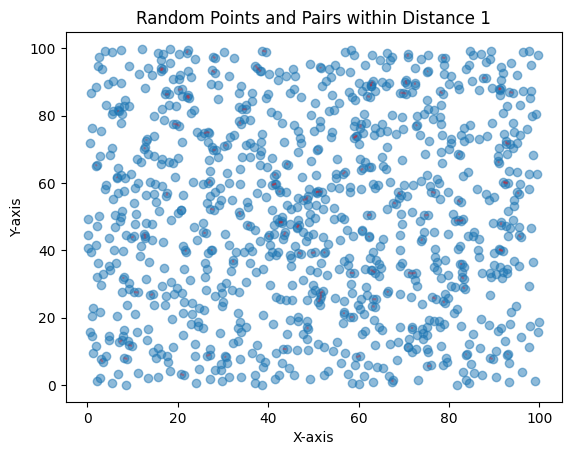

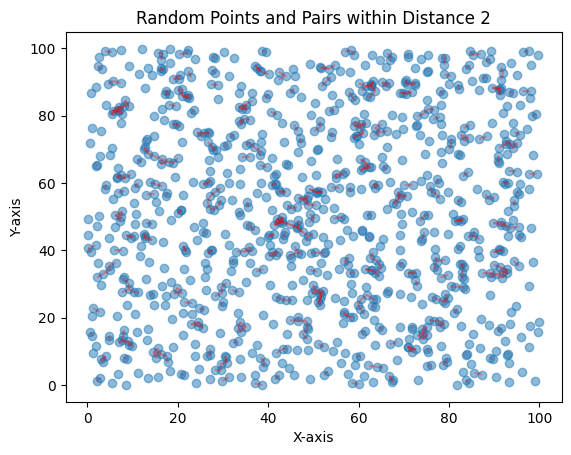

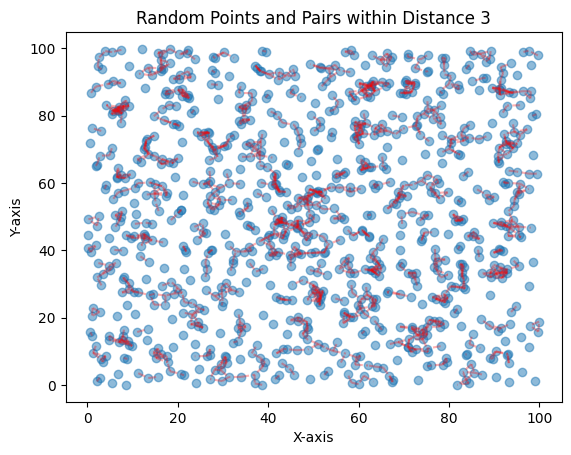

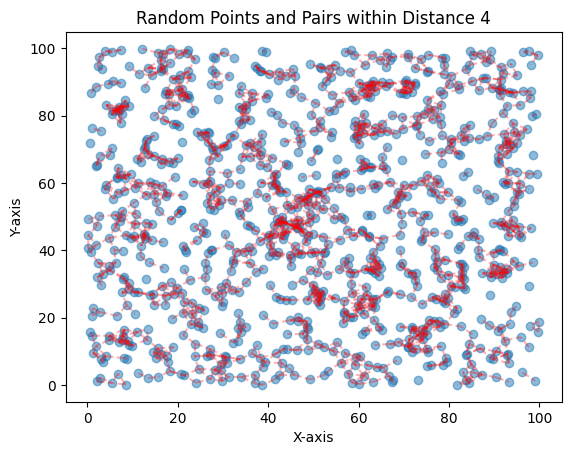

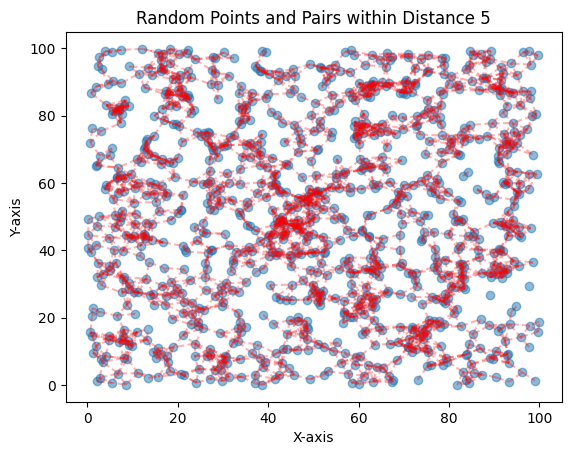

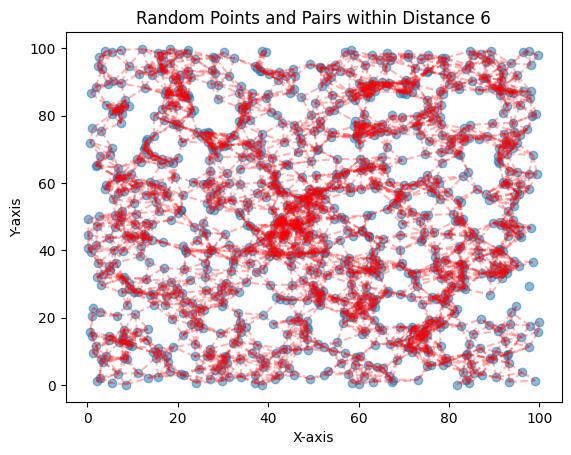

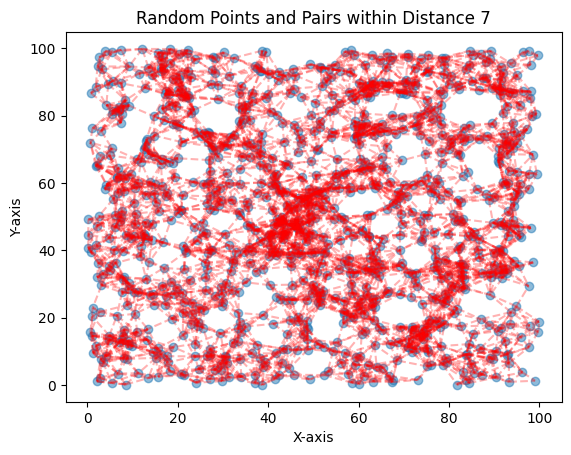

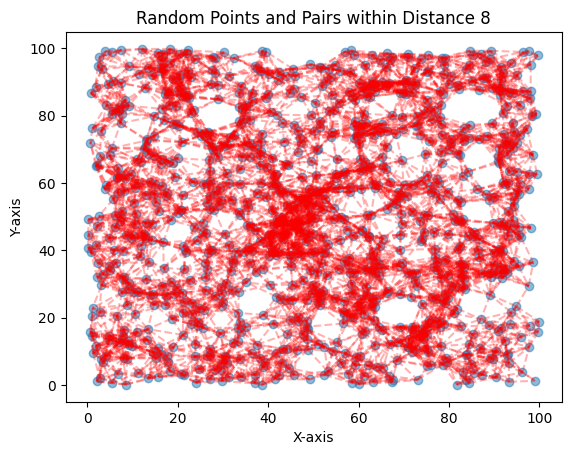

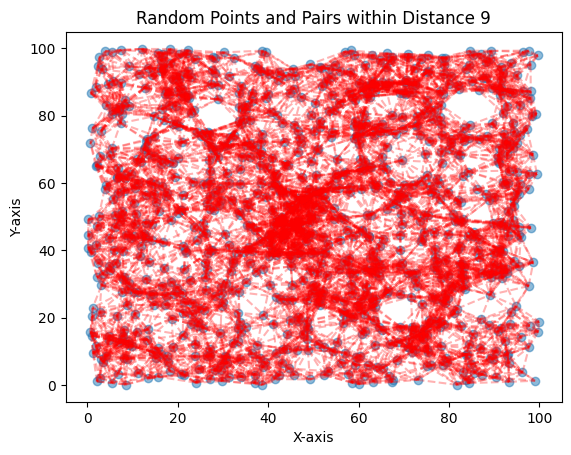

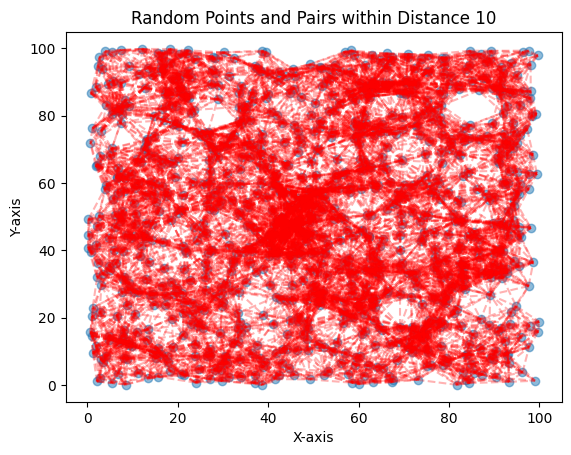

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate random 2D points
def generate_random_points(num_points, dimensions, coord_range):
    return np.random.uniform(low=0, high=coord_range, size=(num_points, dimensions))

# Function to divide points into cells based on the grid size
def divide_into_cells(points, grid_size):
    cell_indices = (points // grid_size).astype(int)
    return cell_indices

# Function to find pairs within a specified distance threshold
def find_pairs_within_distance(points, distance_threshold):
    num_points = len(points)
    pairs = set()

    for i in range(num_points):
        for j in range(i + 1, num_points):
            distance = np.linalg.norm(points[i] - points[j])
            if distance < distance_threshold:
                pairs.add((i, j))

    return pairs

# Function to visualize points and pairs using matplotlib
def visualize_points_and_pairs(points, pairs, distance_threshold):
    plt.scatter(points[:, 0], points[:, 1], label='Random Points', alpha=0.5)

    for pair in pairs:
        plt.plot(points[pair, 0], points[pair, 1], 'r--', alpha=0.3)  # I am using dotted lines for pairs

    plt.title(f'Random Points and Pairs within Distance {distance_threshold}')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

# Generate random 2D points
points_2d = generate_random_points(num_points=1000, dimensions=2, coord_range=100)

# Task 2: For r = {1, 2, ..., 10}, divide the points into a grid and find pairs
results_2d = {}

for r in range(1, 11):
    # Divide points into cells based on the grid size
    cell_indices = divide_into_cells(points_2d, grid_size=r)

    # Find pairs within the specified distance threshold
    pairs = find_pairs_within_distance(points_2d, distance_threshold=r)
    results_2d[r] = pairs

    # Visualize the points and pairs
    visualize_points_and_pairs(points_2d, pairs, distance_threshold=r)


In [22]:
# Task 3: For higher dimensions (d = 3, 4, 10, 50, 100)
high_dimensions = [3, 4, 10, 50, 100]
results_high_dimensions = {}

# Iterate over different dimensions
for dim in high_dimensions:
    # Generate random points in the specified dimension
    points_high_dim = generate_random_points(num_points=1000, dimensions=dim, coord_range=100)
    results_dim = {}

    # For each dimension, iterate over the specified range of grid sizes
    for r in range(1, 11):
        # Divide points into cells based on the grid size
        cell_indices = divide_into_cells(points_high_dim, grid_size=r)
        
        # Find pairs within the specified distance threshold
        pairs = find_pairs_within_distance(points_high_dim, distance_threshold=r)
        results_dim[r] = pairs

    results_high_dimensions[dim] = results_dim

# Display the results for higher dimensions
#print("Results for Higher Dimensions:")
#print(results_high_dimensions)
